# Swin Unet

- Model implematation: https://medium.com/@ashishbisht0307/swin-transformer-based-unet-architecture-for-semantic-segmentation-with-pytorch-code-91e779334e8e
- Paper: https://arxiv.org/abs/2105.05537


In [1]:
%pip install einops timm imutils torchvision lightning torchmetrics

  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 5.9 MB/s eta 0:00:00
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=bb84e98ef85eba653761b1968edefc9f8361bfa21f0a899538bb63f14d91e76a
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [1]:
try:
    from utils import get_seg_lightning_modules, get_segmentation_plot, local_paths, kaggle_paths
    from swin_unet import SwinTransformerSys
except Exception as e:
    import sys
    sys.path.append("/kaggle/input/segmentation-util")
    from utils import get_seg_lightning_modules, get_segmentation_plot, local_paths, kaggle_paths
    from swin_unet import SwinTransformerSys
from lightning.pytorch.callbacks import EarlyStopping

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
FAST = False # Fast dev: run 1 batch only
LOCAL = True
ACCELERATOR = 'mps'

dataset_paths = local_paths if LOCAL else kaggle_paths

## Shenzhen


In [10]:
s_dm, s_module, s_trainer = get_seg_lightning_modules(
    data_paths=dataset_paths['shenzen'],
    model_name='shenzen_swinunet_small_1_epochs',
    model=SwinTransformerSys(img_size=512, patch_size=4, window_size=2, num_classes=2, embed_dim=24),
    fast=FAST,
    accelerator=ACCELERATOR,
    devices='auto', 
    learning_rate=1e-5,
    max_epochs=5,
    callbacks=[EarlyStopping('val_ce_loss', patience=5)],
)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.1;num_classes:2
---final upsample expand_first---


In [11]:
s_trainer.fit(s_module, s_dm)


  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | SwinTransformerSys | 1.7 M  | train
1 | loss_fn   | CrossEntropyLoss   | 0      | train
2 | f1        | BinaryF1Score      | 0      | train
3 | accuracy  | BinaryAccuracy     | 0      | train
4 | recall    | BinaryRecall       | 0      | train
5 | precision | BinaryPrecision    | 0      | train
6 | mean_iou  | MeanIoU            | 0      | train
7 | dice      | Dice               | 0      | train
---------------------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.843     Total estimated model params size (MB)


318 examples in the training set...
106 examples in the validation set...
Epoch 4: 100%|██████████| 159/159 [01:48<00:00,  1.46it/s, v_num=2, val_ce_loss=0.355, val_dice_score=0.862, train_ce_loss=0.445, train_dice_score=0.809]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 159/159 [01:48<00:00,  1.46it/s, v_num=2, val_ce_loss=0.355, val_dice_score=0.862, train_ce_loss=0.445, train_dice_score=0.809]


142 examples in the test set...


[<Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>]

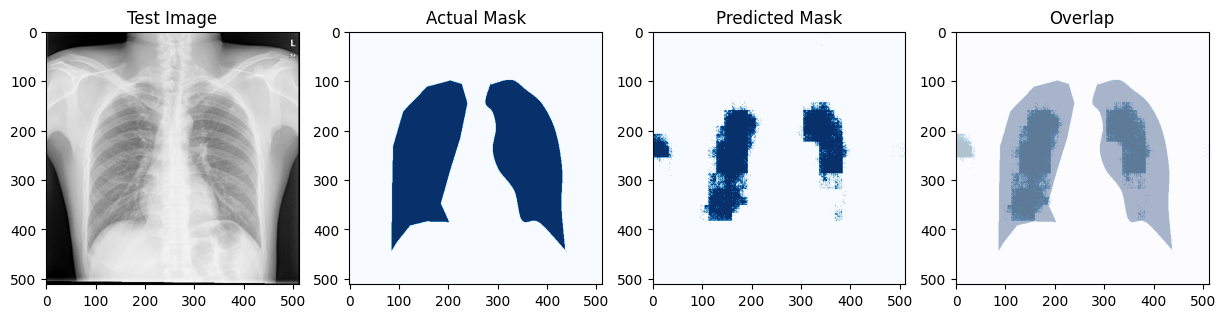

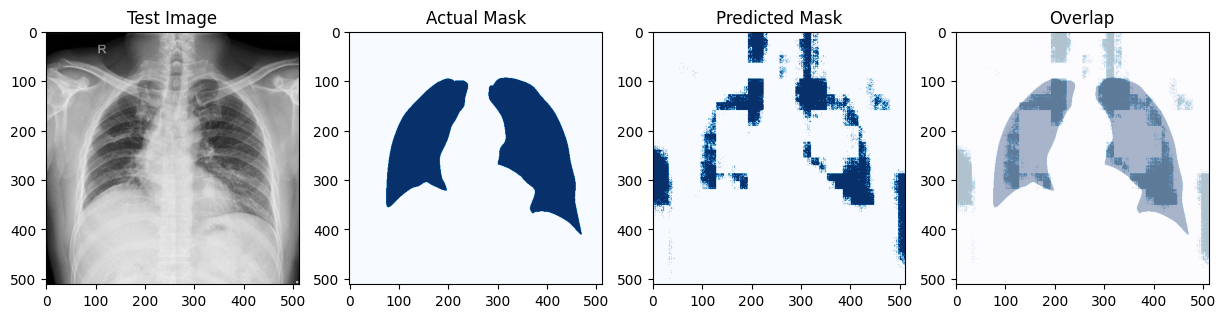

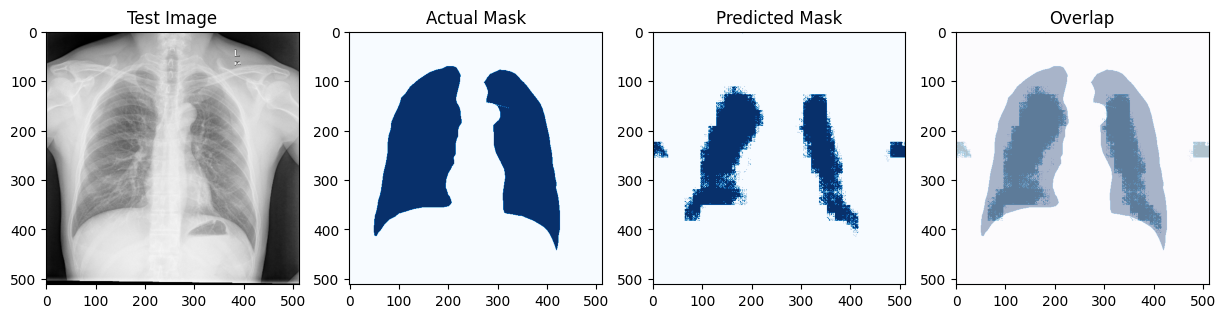

In [12]:
s_dm.setup('test')
get_segmentation_plot(
    s_module.model,
    s_dm.test,
    device='cpu',
)